In [1]:
import requests


In [12]:
url = 'https://raw.githubusercontent.com/coding-blocks-archives/machine-learning-online-2018/master/Datasets/MNIST-2/mnist_train.csv'
reponse=requests.get(url ,allow_redirects=True)
with open('mnist2_train.csv','wb') as f:
    f.write(response.content)

In [3]:
import pandas as pd
df=pd.read_csv('mnist2_train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(42000, 785)

In [7]:
#convert to a numpy array
import numpy as np
data=df.values
np.random.shuffle(data)
print(data)

[[2 0 0 ... 0 0 0]
 [8 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 ...
 [6 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 [7 0 0 ... 0 0 0]]


In [8]:
X=data[ : ,1: ]
Y=data[ : ,0]

In [9]:
print(X.shape,Y.shape)

(42000, 784) (42000,)


In [10]:
print(Y)

[2 8 6 ... 6 4 7]


In [11]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


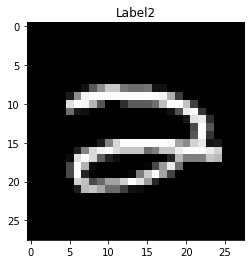

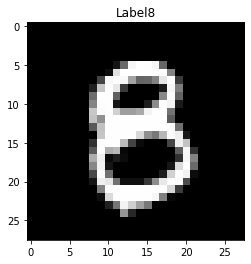

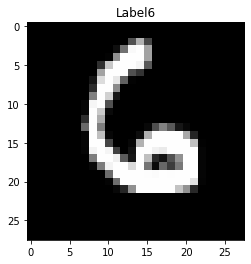

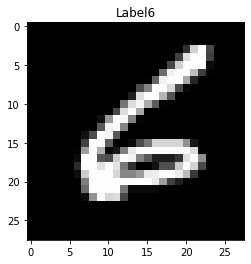

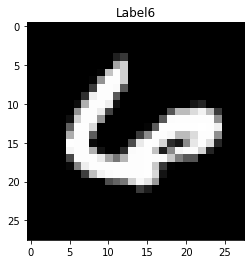

In [12]:
import matplotlib.pyplot as plt
def drawImg(X,Y,i):
    plt.imshow(X[i].reshape(28,28),cmap='gray') #reshape because images are 2d arrays
    plt.title("Label"+str(Y[i]))
    plt.show()
    
for i in range (5):    
        drawImg(X,Y,i)    

In [13]:
split=int(.80*X.shape[0])
print(split)

33600


In [27]:
x_train,y_train=X[ :split, : ],Y[ :split]
x_test,y_test=X[split: , : ],Y[split : ]

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(33600, 784) (33600,)
(8400, 784) (8400,)


In [28]:
#randomisation of array.Helps when dataset is not randomly shuffled.Use this for 2D aarys also
import numpy as np
a=np.array([1,2,3,4,5])
np.random.shuffle(a)
print(a)

[4 5 1 3 2]


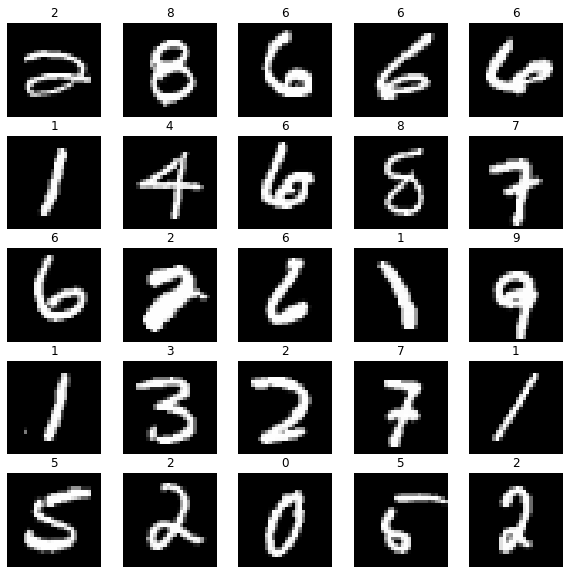

In [29]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i].reshape(28,28),cmap='gray')
    plt.axis('off')
    plt.title(y_train[i])
   # plt.show()

In [30]:
def dist(x1,x2):
    return np.sqrt(sum(x1-x2)**2)

def knn(x,y,query,k=10):
    
    value=[]
    m=x.shape[0]
    
    for i in range(m):
        d=dist(query,x[i])
        value.append((d,y[i]))
        
    values=sorted(value)
    #nearest first k points
    values=values[:k]
    values=np.array(values)
    print(values)
    new_vals=np.unique(values[:,1],return_counts=True)
    index=new_vals[1].argmax()
    pred=new_vals[0][index]
   
    return pred
    

In [38]:
pred= knn(x_train,y_train,x_test[100])
print(int(pred))

[[1. 1.]
 [1. 1.]
 [1. 4.]
 [1. 7.]
 [1. 8.]
 [2. 1.]
 [2. 3.]
 [2. 4.]
 [2. 6.]
 [2. 7.]]
1


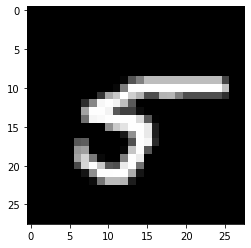

5


In [39]:
def drawImg(sample):
    img=sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()
drawImg(x_test[100])
print(y_test[100])

In [37]:
def computeAccuracy(x_train,y_train,x_test,y_test) :
    m = x_test.shape[0]
    # print(m)
    accurate = 0
    for i in range(m) :
        pred = knn(x_train,y_train,x_test[i])
        if(int(pred) == y_test[i]) :
            accurate += 1
    
    Accuracy =(accurate*100)/m
    return Accuracy
    
a=computeAccuracy(x_train,y_train,x_test,y_test) 
print(a)

[[1. 4.]
 [1. 4.]
 [1. 7.]
 [1. 9.]
 [2. 5.]
 [2. 5.]
 [2. 6.]
 [2. 7.]
 [2. 8.]
 [3. 6.]]
[[0. 4.]
 [0. 9.]
 [1. 1.]
 [1. 2.]
 [1. 5.]
 [1. 7.]
 [2. 9.]
 [4. 1.]
 [4. 7.]
 [5. 0.]]
[[1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 6.]
 [1. 9.]
 [2. 5.]
 [3. 8.]
 [4. 2.]
 [4. 6.]
 [5. 4.]]
[[0. 0.]
 [0. 0.]
 [0. 2.]
 [0. 9.]
 [1. 2.]
 [3. 6.]
 [3. 9.]
 [3. 9.]
 [4. 8.]
 [5. 2.]]
[[0. 3.]
 [1. 2.]
 [1. 4.]
 [1. 4.]
 [1. 9.]
 [2. 3.]
 [2. 3.]
 [2. 4.]
 [2. 9.]
 [4. 7.]]
[[0. 5.]
 [1. 0.]
 [1. 0.]
 [1. 4.]
 [1. 5.]
 [2. 6.]
 [2. 8.]
 [2. 8.]
 [3. 0.]
 [3. 4.]]


KeyboardInterrupt: 